In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

In [10]:
def plot_importances(df_importances, save=None, xrot=0, tickstep=3, scalefig=(1.0,1.0)):
    """
    Given an array or data frame of importances, plot a horizontal bar chart
    showing the importance values.
    """
    I = df_importances

    fig = plt.figure()
    w, h = fig.get_size_inches()
    fig.set_size_inches(w*scalefig[0], h*scalefig[1], forward=True)
    ax = plt.gca()
    ax.barh(np.arange(len(I.index)), I.Importance, height=.7, tick_label=I.iloc[:,0])

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    ax.set_aspect((x1 - x0) / (y1 - y0))

    # rotate x-ticks
    if xrot is not None:
        plt.xticks(rotation=xrot)

    # xticks freq
    xticks = ax.get_xticks()
    nticks = len(xticks)
    new_ticks = xticks[np.arange(0, nticks, step=tickstep)]
    ax.set_xticks(new_ticks)

    plt.tight_layout()
    if save:
        plt.savefig(save, bbox_inches="tight", pad_inches=0.03)
    plt.show()

## Classification - Accuracy

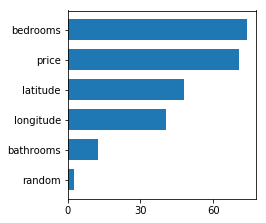

In [11]:
df = pd.read_csv("data/imp_R_class_acc.csv")
df = df.rename(columns={ df.columns[1]: "Importance" })
sort = df.sort_values(df.columns[1], ascending = True)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/cls_permute_random_R.svg')

## Classification - Gini

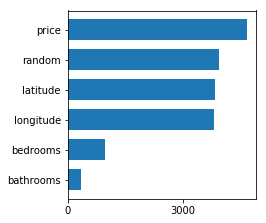

In [12]:
df = pd.read_csv("data/imp_R_class_gini.csv")
df

df = df.rename(columns={ df.columns[1]: "Importance" })
sort = df.sort_values(df.columns[1], ascending = True)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/cls_dflt_random_R.svg')

## Classification - Drop

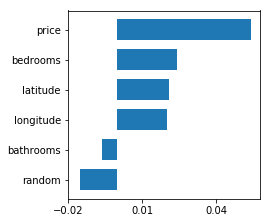

In [13]:
df = pd.read_csv("data/imp_R_class_drop.csv")
df

#df = df.rename(columns={ df.columns[1]: "Importance" })
sort = df.sort_values(df.columns[2], ascending = True)
sort = sort.drop(sort.columns[0], axis=1)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/R_class_drop_random.svg')

## Regression - MSE

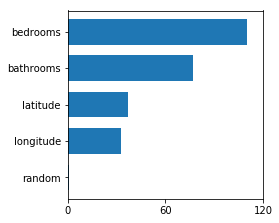

In [14]:
df = pd.read_csv("data/imp_R_regr_MSE.csv")
df

df = df.rename(columns={ df.columns[1]: "Importance" })

df = df.rename(columns={ df.columns[0]: "Feature" })
df

sort = df.sort_values(df.columns[1], ascending = True)
#sort = sort.drop(sort.columns[0], axis=1)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/regr_permute_random_R.svg')

## Regression - RSE

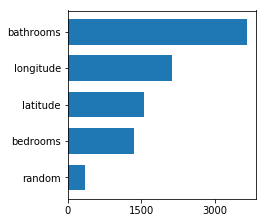

In [15]:
df = pd.read_csv("data/imp_R_regr_RSS.csv")
df

df = df.rename(columns={ df.columns[1]: "Importance" })

df = df.rename(columns={ df.columns[0]: "Feature" })
df

sort = df.sort_values(df.columns[1], ascending = True)
#sort = sort.drop(sort.columns[0], axis=1)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/regr_dflt_random_R.svg')

## Regression - drop

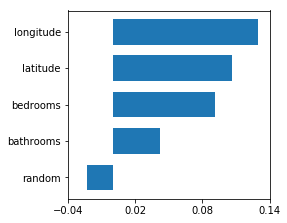

In [16]:
df = pd.read_csv("data/imp_R_regr_drop.csv")
df

df = df.drop(df.columns[0], axis=1)

df = df.rename(columns={ df.columns[1]: "Importance" })

df = df.rename(columns={ df.columns[0]: "Feature" })
df

sort = df.sort_values(df.columns[1], ascending = True)
#sort = sort.drop(sort.columns[0], axis=1)
sort

plot_importances(sort, scalefig=(1.0,0.8), save='../article/images/regr_drop_random_R.svg')